# Spatio- Temporal Data Analysis

Kaggle dataset for SF Crime - https://www.kaggle.com/competitions/sf-crime/data

## Load the data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

# Load the dataset from the provided CSV file
data = pd.read_csv('/content/gdrive/MyDrive/DM-Assignment-Dataset/sf-crime-train.csv')

# Display the first few rows of the dataset to get a sense of the data
data.head()


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,5/13/2015 23:53,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,5/13/2015 23:53,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,5/13/2015 23:33,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,5/13/2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,5/13/2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


## Check for missing values

In [ ]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

missing_values


Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

The dataset doesn't have any missing values in any of its columns. All columns are complete.

## Visualize distributions of key features


1. Distribution of crime categories.
2. Distribution of events by day of the week.
3. Distribution of events across different police districts.
4. Distribution of crime resolutions.

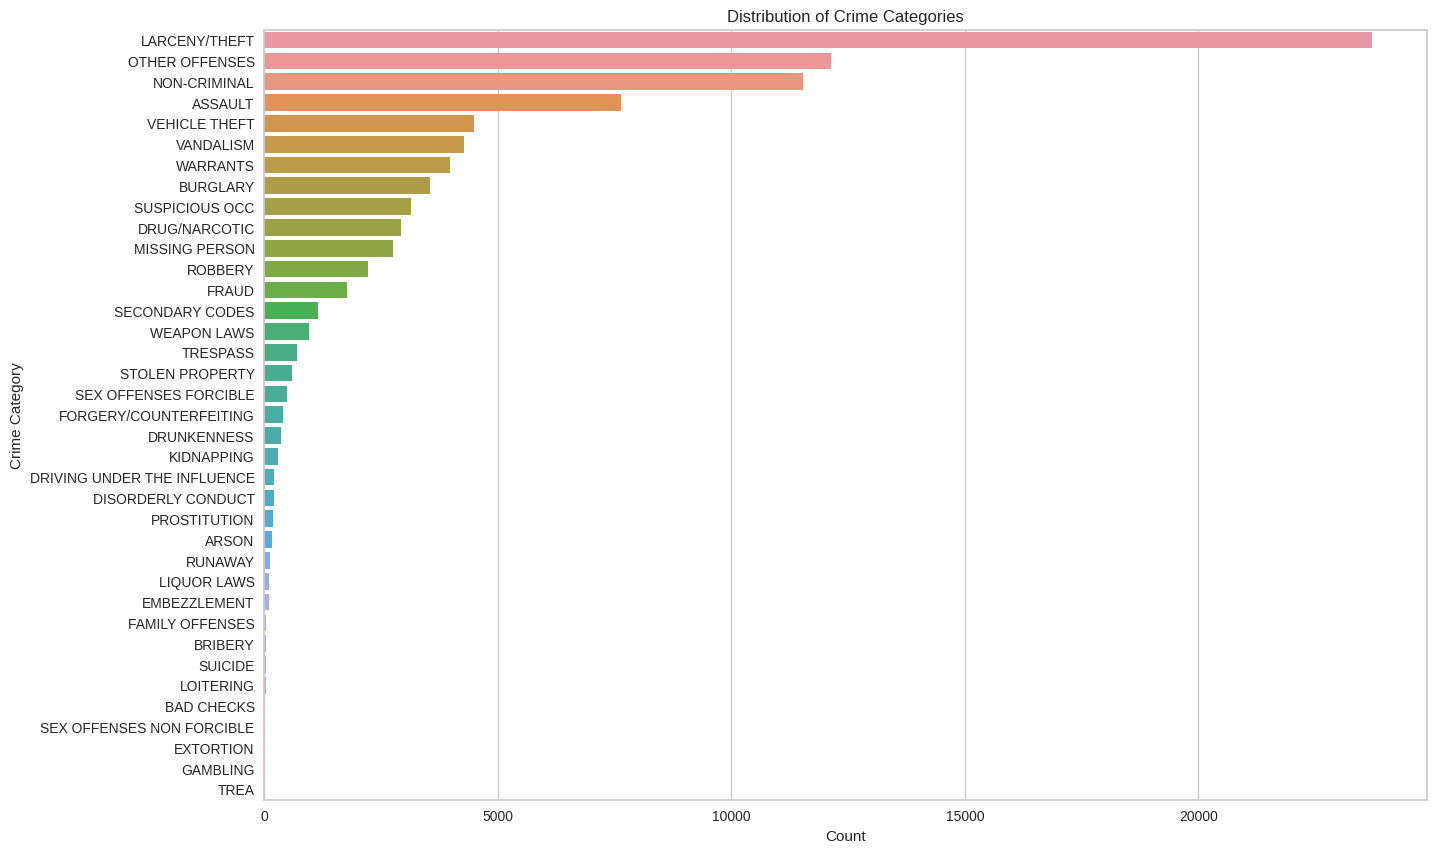

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the figure size
plt.figure(figsize=(15, 10))

# Plotting the distribution of crime categories
sns.countplot(y="Category", data=data, order=data['Category'].value_counts().index)
plt.title('Distribution of Crime Categories')
plt.xlabel('Count')
plt.ylabel('Crime Category')
plt.show()


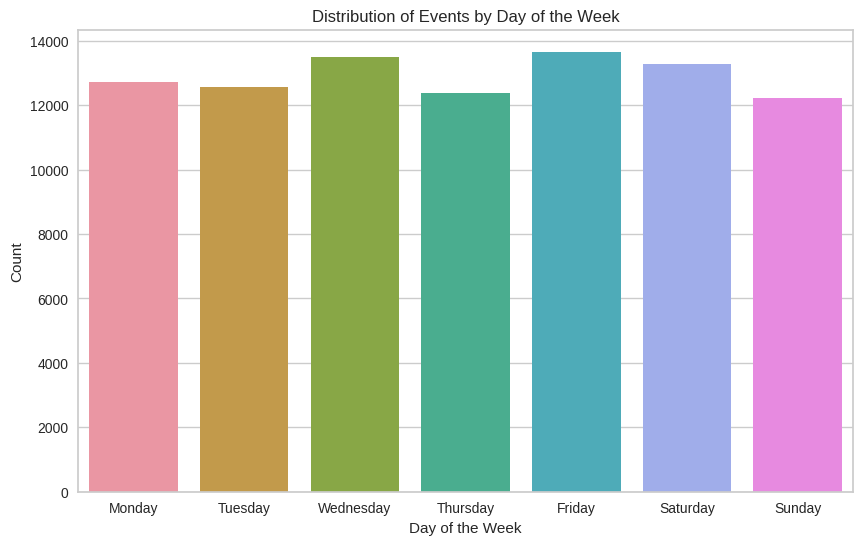

In [ ]:
# Setting the figure size
plt.figure(figsize=(10, 6))

# Order for days of the week
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the distribution of events by day of the week
sns.countplot(x="DayOfWeek", data=data, order=order_days)
plt.title('Distribution of Events by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()


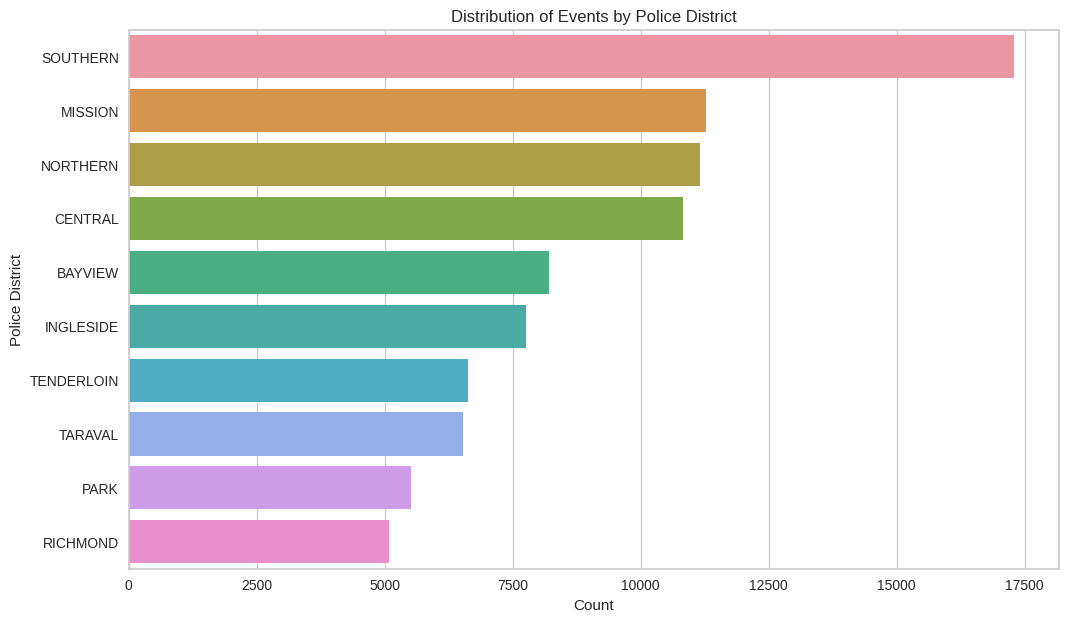

In [ ]:
# Setting the figure size
plt.figure(figsize=(12, 7))

# Plotting the distribution of events by police district
sns.countplot(y="PdDistrict", data=data, order=data['PdDistrict'].value_counts().index)
plt.title('Distribution of Events by Police District')
plt.xlabel('Count')
plt.ylabel('Police District')
plt.show()


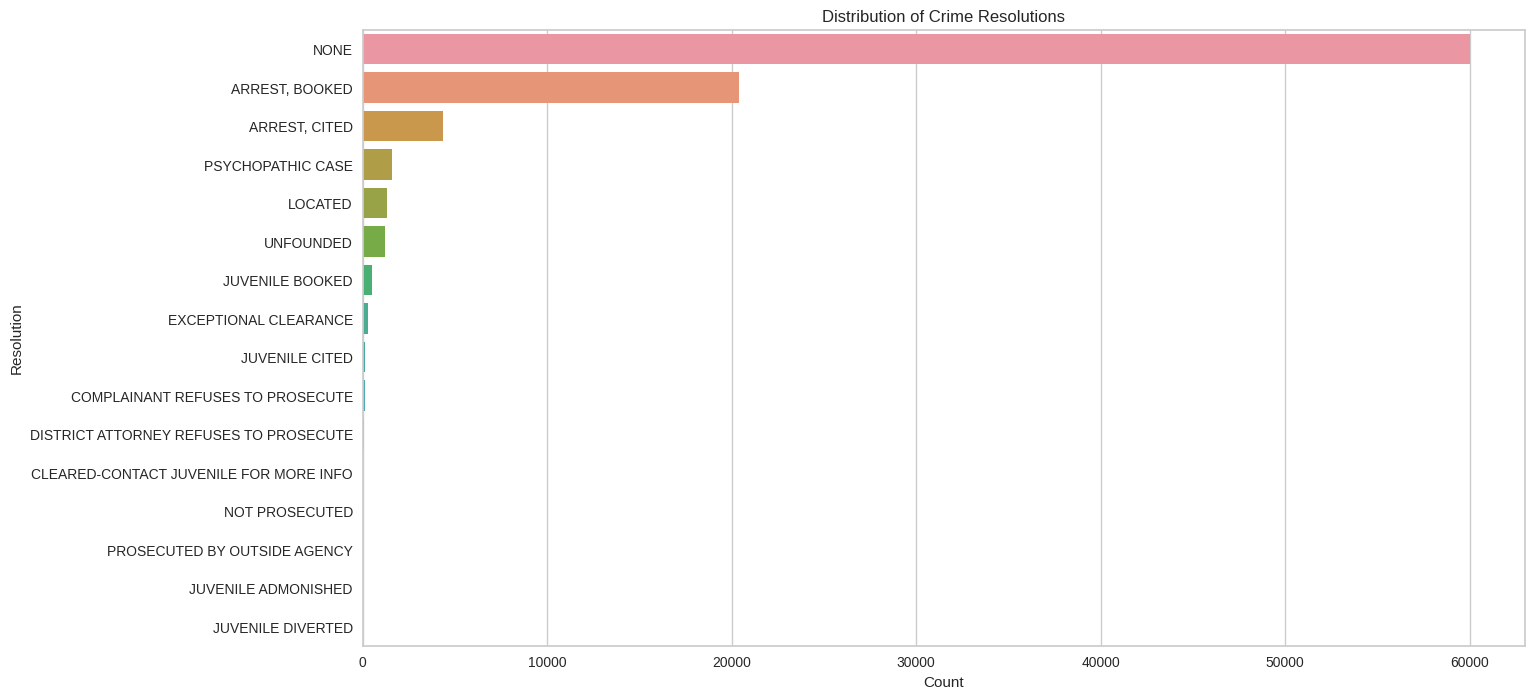

In [ ]:
# Setting the figure size
plt.figure(figsize=(15, 8))

# Plotting the distribution of crime resolutions
sns.countplot(y="Resolution", data=data, order=data['Resolution'].value_counts().index)
plt.title('Distribution of Crime Resolutions')
plt.xlabel('Count')
plt.ylabel('Resolution')
plt.show()


## Check for correlations between features

I will now investigate the correlations between the numerical features in the dataset. Specifically, I'll check the correlation between the latitude (Y) and longitude (X) columns, as these are the primary numerical columns in this dataset.

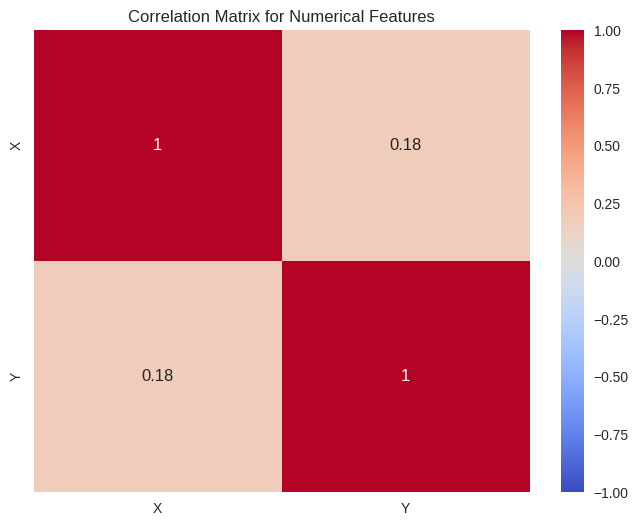

In [ ]:
# Compute the correlation matrix for the numerical features
correlation_matrix = data[['X', 'Y']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Features')
plt.show()


## Use auto EDA tools

In [ ]:
# Descriptive statistics for numerical columns
numerical_descriptive = data.describe()

# Frequency of top categories for non-numerical columns
category_frequencies = data.select_dtypes(include=['object']).apply(lambda x: x.value_counts().head(5))

numerical_descriptive, category_frequencies


(                  X             Y
 count  90284.000000  90284.000000
 mean    -122.423076     37.768554
 std        0.025832      0.023873
 min     -122.513642     37.708031
 25%     -122.433814     37.755381
 50%     -122.416558     37.775421
 75%     -122.406539     37.785096
 max     -122.365241     37.819975,
                                        Dates  Category  Descript  DayOfWeek  \
 10/1/2014 12:00                         25.0       NaN       NaN        NaN   
 1000 Block of POTRERO AV                 NaN       NaN       NaN        NaN   
 16TH ST / MISSION ST                     NaN       NaN       NaN        NaN   
 2/20/2015 0:01                          25.0       NaN       NaN        NaN   
 2000 Block of MISSION ST                 NaN       NaN       NaN        NaN   
 4/1/2014 0:01                           29.0       NaN       NaN        NaN   
 4/1/2015 0:01                           25.0       NaN       NaN        NaN   
 6/1/2014 0:01                           25.

In [ ]:
!pip install sweetviz


In [ ]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html('report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Data Preprocessing:

Remove Duplicates:

In [ ]:
# Check for duplicate rows
initial_count = len(data)
data = data.drop_duplicates()
final_count = len(data)

duplicate_count = initial_count - final_count
duplicate_count


234

## Handle Outliers:

In [ ]:
def remove_outliers_iqr(df, column):
    """
    Remove outliers using IQR method.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_out

data_cleaned_X = remove_outliers_iqr(data, "X")
data_cleaned_XY = remove_outliers_iqr(data_cleaned_X, "Y")

outliers_removed = len(data) - len(data_cleaned_XY)
outliers_removed


8145

### Feature Engineering


1. Creating New Features Based on Domain Knowledge:
While domain-specific features depend on the expertise of the domain, based on the data at hand, we can derive some generic features like the hour, day, month, and year from the "Dates" column.

2. Convert Categorical Variables to Numerical:
We'll convert categorical variables to numerical representations using techniques like one-hot encoding and label encoding.

3. Normalize/Standardize Numerical Features:
We'll standardize the numerical features X and Y so they have a mean of 0 and a standard deviation of 1.

In [ ]:
# Convert the 'Dates' column to datetime format
data_cleaned_XY['Dates'] = pd.to_datetime(data_cleaned_XY['Dates'])

# Extract hour, day, month, and year from the 'Dates' column
data_cleaned_XY['Hour'] = data_cleaned_XY['Dates'].dt.hour
data_cleaned_XY['Day'] = data_cleaned_XY['Dates'].dt.day
data_cleaned_XY['Month'] = data_cleaned_XY['Dates'].dt.month
data_cleaned_XY['Year'] = data_cleaned_XY['Dates'].dt.year

# Display the first few rows to verify the new features
data_cleaned_XY[['Dates', 'Hour', 'Day', 'Month', 'Year']].head()


,Dates,Hour,Day,Month,Year
0,2015-05-13 23:53:00,23,13,5,2015
1,2015-05-13 23:53:00,23,13,5,2015
2,2015-05-13 23:33:00,23,13,5,2015
3,2015-05-13 23:30:00,23,13,5,2015
4,2015-05-13 23:30:00,23,13,5,2015


In [ ]:
from sklearn.preprocessing import LabelEncoder

# One-hot encoding for 'DayOfWeek' column
data_encoded = pd.get_dummies(data_cleaned_XY, columns=['DayOfWeek'], drop_first=True)

# Label encoding for other categorical columns
label_columns = ['Category', 'Descript', 'PdDistrict', 'Resolution', 'Address']

label_encoders = {}
for column in label_columns:
    le = LabelEncoder()
    data_encoded[column] = le.fit_transform(data_encoded[column])
    label_encoders[column] = le

# Display the first few rows to verify the encoding
data_encoded.head()


,Dates,Category,Descript,PdDistrict,Resolution,Address,X,Y,Hour,Day,Month,Year,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,2015-05-13 23:53:00,35,665,4,0,9982,-122.425892,37.774599,23,13,5,2015,0,0,0,0,0,1
1,2015-05-13 23:53:00,21,625,4,0,9982,-122.425892,37.774599,23,13,5,2015,0,0,0,0,0,1
2,2015-05-13 23:33:00,21,625,4,0,11208,-122.424363,37.800414,23,13,5,2015,0,0,0,0,0,1
3,2015-05-13 23:30:00,16,311,4,11,2426,-122.426995,37.800873,23,13,5,2015,0,0,0,0,0,1
4,2015-05-13 23:30:00,16,311,5,11,991,-122.438738,37.771541,23,13,5,2015,0,0,0,0,0,1


Let's normalize the numerical features X and Y using standardization. This will transform the data such that it has a mean of 0 and a standard deviation of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Features to be standardized
features_to_standardize = ['X', 'Y']

# Apply standardization
scaler = StandardScaler()
data_encoded[features_to_standardize] = scaler.fit_transform(data_encoded[features_to_standardize])

# Display the first few rows to verify the standardization
data_encoded[['X', 'Y']].head()


,X,Y
0,-0.398013,0.169256
1,-0.398013,0.169256
2,-0.317985,1.331087
3,-0.455786,1.351713
4,-1.070498,0.031657


## Feature Selection


1. Recursive Feature Elimination (RFE): This method recursively removes attributes and builds a model on the attributes that remain. It uses model accuracy to identify which attributes contribute the most to predicting the target attribute.
2. Feature Importance from Tree-Based Models: Tree-based algorithms like Decision Trees and Random Forest can be used to rank features based on their importance.
3. Correlation Analysis: Features that are highly correlated with the target variable can be selected, while features that are highly correlated with each other can be reduced to avoid multicollinearity.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Features and target variable
X = data_encoded.drop(columns=['Dates', 'Category'])
y = data_encoded['Category']

# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

features_df


,Feature,Importance
0,Descript,0.555843
2,Resolution,0.081478
5,Y,0.062615
3,Address,0.058944
4,X,0.057612
6,Hour,0.044097
7,Day,0.042420
8,Month,0.033792
1,PdDistrict,0.015827
9,Year,0.007934


Here are the features ranked by their importance according to the Random Forest classifier:

* Descript is the most influential feature, followed by Resolution, Y, Address, and X.
* The time-based features we derived (Hour, Day, Month, Year) also have significant importance.
* The DayOfWeek features (resulting from one-hot encoding) have comparatively lower importance.

## Clustering and Anomaly Detection

Clustering using KMeans:

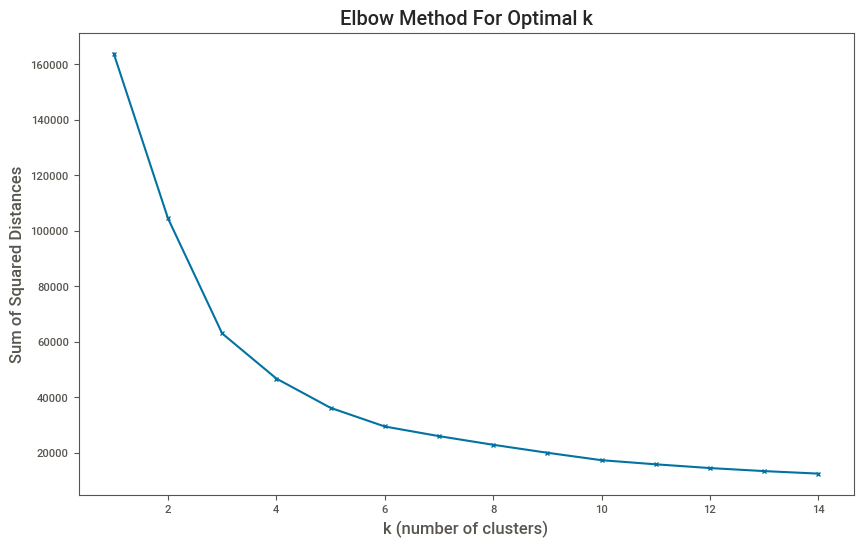

In [ ]:
from sklearn.cluster import KMeans

# Data for clustering (using spatial coordinates)
X_clustering = data_encoded[['X', 'Y']]

# Calculate the sum of squared distances for different numbers of cluster centers
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_clustering)
    sum_of_squared_distances.append(km.inertia_)

# Plotting the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k (number of clusters)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()


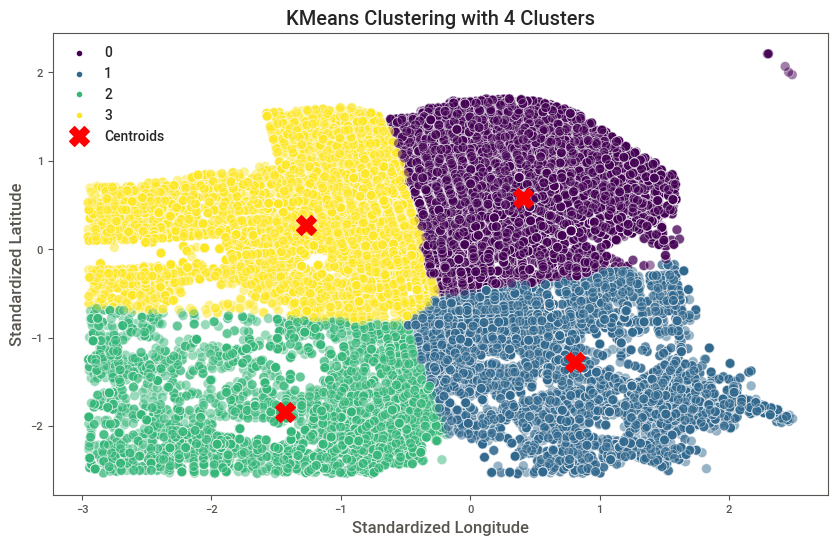

In [ ]:
# Using KMeans to cluster the data into 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
data_encoded['Cluster'] = kmeans.fit_predict(X_clustering)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', hue='Cluster', data=data_encoded, palette='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('KMeans Clustering with 4 Clusters')
plt.xlabel('Standardized Longitude')
plt.ylabel('Standardized Latitude')
plt.legend()
plt.show()


### Anomaly Detection using Isolation Forest:

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest


# Data for anomaly detection (using spatial coordinates)
X_anomaly_detection = data[['X', 'Y']]

# Initialize and fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data['anomaly'] = iso_forest.fit_predict(X_anomaly_detection)

# Filter out the anomaly data points
anomalies = data[data['anomaly'] == -1][['X', 'Y']]

# Number of anomalies detected
num_anomalies = len(anomalies)
num_anomalies


4491

## Model Building:


Split Data into Training and Test Sets

In [ ]:
data_encoded.to_csv('train-encoded.csv')

In [ ]:
data = data_encoded

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test sets
X = data.drop('Category', axis=1)
y = data['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape



((65524, 18), (16381, 18), (65524,), (16381,))

In [ ]:
!pip install pycaret

  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.3
    Uninstalling scipy-1.11.3:
      Successfully uninstalled scipy-1.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
orbax-checkpoint 0.4.1 requires jax>=0.4.9, but you have jax 0.3.25 which is incompatible.


In [ ]:
X_train = X_train.drop('Dates', axis=1)
X_test = X_test.drop('Dates', axis=1)


In [ ]:
!pip install scipy --upgrade


  Using cached scipy-1.11.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
orbax-checkpoint 0.4.1 requires jax>=0.4.9, but you have jax 0.3.25 which is incompatible.
pycaret 3.1.0 requires scipy~=1.10.1, but you have scipy 1.11.3 which is incompatible.


In [ ]:
# Count the number of instances for each class in the 'Category' column
class_counts = data['Category'].value_counts()

# Identify classes with only one instance
single_instance_classes = class_counts[class_counts == 1].index

# Filter out those classes from the dataset
filtered_data = data[~data['Category'].isin(single_instance_classes)]

filtered_data['Category'].value_counts().min()  # Check the minimum count after filtering


9

In [ ]:
from pycaret.classification import setup

# Initialize the setup
clf1 = setup(filtered_data, target='Category')


,Description,Value
0,Session id,6804
1,Target,Category
2,Target type,Multiclass
3,Target mapping,"0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35"
4,Original data shape,"(81904, 19)"
5,Transformed data shape,"(81904, 21)"
6,Transformed train set shape,"(57332, 21)"
7,Transformed test set shape,"(24572, 21)"
8,Numeric features,17
9,Date features,1


### Ensembeled

1. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test)

# Calculate the accuracy of the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)

rf_accuracy


0.8486050912642695

The Random Forest classifier achieved an accuracy of approximately
84.86%. Here are the metrics for a few classes from the detailed classification report: